Иногда используют комбинацию двух методов — ElasticNet, чтобы получить
преимущества обоих подходов.

Пример. Допустим, у вас есть данные о квартирах:

Если добавить лишние признаки вроде "цвет подъезда" или "номер квартиры",
модель без регуляризации может случайно посчитать их важными. Lasso исключит такие
бессмысленные признаки, а Ridge уменьшит их влияние.

Рассмотрим пример кода, который демонстрирует, как Lasso и Ridge регрессия
обрабатывают данные о квартирах и какие признаки могут быть исключены или
уменьшены с помощью регуляризации:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [4]:
# Пример данных о квартирах
data = {
"Площадь": [50, 65, 40, 80, 55],
"Этаж": [3, 5, 2, 7, 4],
"Возраст_дома": [10, 20, 5, 15, 12],
"Наличие_балкона": [1, 0, 1, 0, 1], # 1 — есть балкон, 0 — нет
"Цвет_подъезда": [1, 0, 1, 0, 0], # Лишний признак
"Номер_квартиры": [101, 202, 303, 404, 505], # Лишний признак
"Цена": [5500, 6200, 4800, 7500, 5900] # Цена в тыс. руб.
}
# Создание DataFrame
df = pd.DataFrame(data)
df

,Площадь,Этаж,Возраст_дома,Наличие_балкона,Цвет_подъезда,Номер_квартиры,Цена
0,50,3,10,1,1,101,5500
1,65,5,20,0,0,202,6200
2,40,2,5,1,1,303,4800
3,80,7,15,0,0,404,7500
4,55,4,12,1,0,505,5900


In [6]:
# Признаки и целевая переменная
X = df[["Площадь", "Этаж", "Возраст_дома", "Наличие_балкона", "Цвет_подъезда",
"Номер_квартиры"]]
y = df["Цена"]
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Обучаем Lasso и Ridge регрессии с регуляризацией
lasso_reg = Lasso(alpha=1.0) # Регуляризация с Lasso
ridge_reg = Ridge(alpha=1.0) # Регуляризация с Ridge
lasso_reg.fit(X_train, y_train)

Lasso()

In [7]:
ridge_reg.fit(X_train, y_train)

Ridge()

In [8]:
# Сравнение коэффициентов признаков
coef_df = pd.DataFrame({
"Признак": X.columns,
"Lasso-регрессия": lasso_reg.coef_,
"Ridge-регрессия": ridge_reg.coef_
})
print(coef_df)

           Признак  Lasso-регрессия  Ridge-регрессия
0          Площадь        67.771013        61.908193
1             Этаж         0.000000         7.566641
2     Возраст_дома         0.000000        17.195883
3  Наличие_балкона        -0.000000        -1.375821
4    Цвет_подъезда        -0.000000        -1.375821
5   Номер_квартиры        -0.109422         0.076133


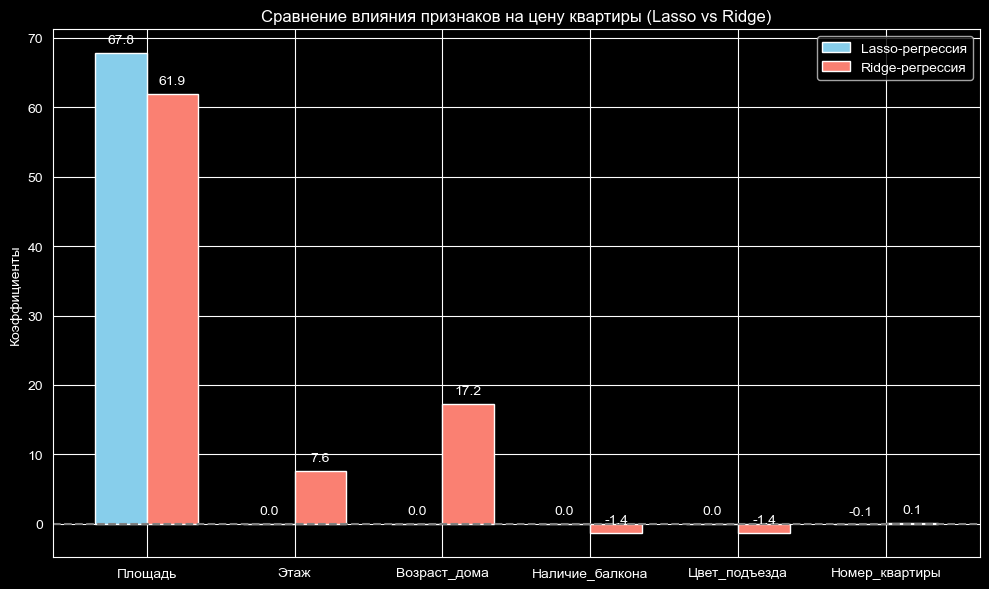

In [9]:
# ВИЗУАЛИЗАЦИЯ влияния признаков
x = np.arange(len(X.columns))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, coef_df["Lasso-регрессия"], width, label='Lasso-регрессия',
color='skyblue')
rects2 = ax.bar(x + width/2, coef_df["Ridge-регрессия"], width, label='Ridge-регрессия',
color='salmon')
ax.set_ylabel('Коэффициенты')
ax.set_title('Сравнение влияния признаков на цену квартиры (Lasso vs Ridge)')
ax.set_xticks(x)
ax.set_xticklabels(coef_df["Признак"])
ax.legend()
# Добавляем значения на столбцы
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Что делает этот код:
1. Создаёт данные о квартирах, включая лишние признаки ("Цвет подъезда" и "Номер
квартиры"), которые не должны влиять на цену.
2. Обучает Lasso-регрессию и Ridge-регрессию, которые используют регуляризацию для
улучшения модели.
3. Сравнивает коэффициенты признаков для обеих моделей и визуализирует их на одном
графике.

Как читать график:

Голубые столбцы — коэффициенты для Lasso-регрессии.
Красные столбцы — коэффициенты для Ridge-регрессии.
Признаки, такие как "Цвет подъезда" и "Номер квартиры", могут иметь коэффициенты
близкие к нулю в Lasso, что означает их исключение из модели.
В Ridge-регрессии коэффициенты для лишних признаков будут меньше, но не нулевые, что
показывает, что регуляризация просто уменьшила их влияние.

Результаты:
Lasso часто обнуляет незначительные признаки, такие как "Цвет подъезда" и "Номер
квартиры", эффективно исключая их из модели.
Ridge уменьшает влияние лишних признаков, но оставляет их в модели с меньшими
коэффициентами, чтобы учесть их, но без переоценки их значимости.

Регуляризация — это своего рода "фильтр", который защищает модель от
переусложнения и помогает фокусироваться на действительно важных признаках. Ridge
делает модель более устойчивой к шуму, а Lasso помогает упростить модель, исключив
малозначимые факторы. Эти методы широко применяются в задачах, где есть множество
переменных, и важно сохранить баланс между точностью модели и её простотой.